In [2]:
import pandas as pd
import numpy as np

# Load DataFrame
df = pd.read_csv("/content/paris_weekends.csv")

# Dropping specified columns
df = df.drop(columns=['lng', 'lat', 'Unnamed: 0', 'attr_index', 'rest_index'])

# Applying logarithmic transformation
df['realSum'] = np.log(df['realSum'])

# Renaming the columns
df = df.rename(columns={'realSum': 'log_realSum'})

# Displaying the DataFrame
df

,log_realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm
0,6.284874,Entire home/apt,False,False,5.0,False,0,1,9.0,89.0,1,1.351201,0.212346,19.001549,47.550371
1,5.670231,Private room,False,True,2.0,True,0,0,10.0,97.0,1,0.699821,0.193710,25.211044,56.219575
2,6.099768,Entire home/apt,False,False,4.0,False,0,1,10.0,100.0,1,0.968982,0.294343,21.039580,49.356741
3,5.353483,Private room,False,True,2.0,False,0,0,10.0,94.0,1,3.302319,0.234740,21.616533,41.650870
4,5.584752,Entire home/apt,False,False,2.0,True,0,0,9.0,88.0,1,1.402430,0.055052,49.279502,62.189313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,5.688537,Entire home/apt,False,False,4.0,False,0,0,9.0,80.0,1,3.660389,0.168146,10.199228,24.926525
3554,5.447088,Entire home/apt,False,False,4.0,False,0,0,10.0,98.0,1,3.558813,0.154703,9.019304,21.882955
3555,5.411315,Entire home/apt,False,False,2.0,False,1,0,9.0,89.0,1,4.205205,0.253029,8.395552,18.756757
3556,5.302596,Entire home/apt,False,False,2.0,True,0,0,9.0,93.0,1,2.891214,0.240674,11.435057,27.792500


<ipython-input-3-bbc28b27f436>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


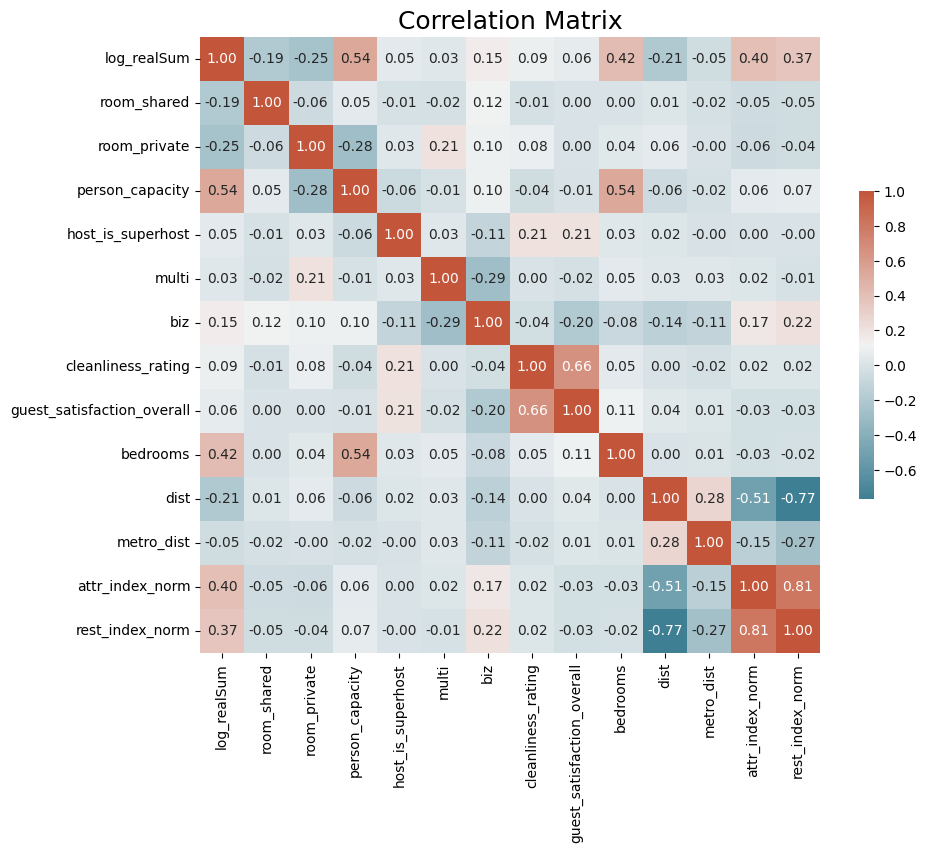

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, cbar_kws={'shrink': .5})

# Add titles and labels
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

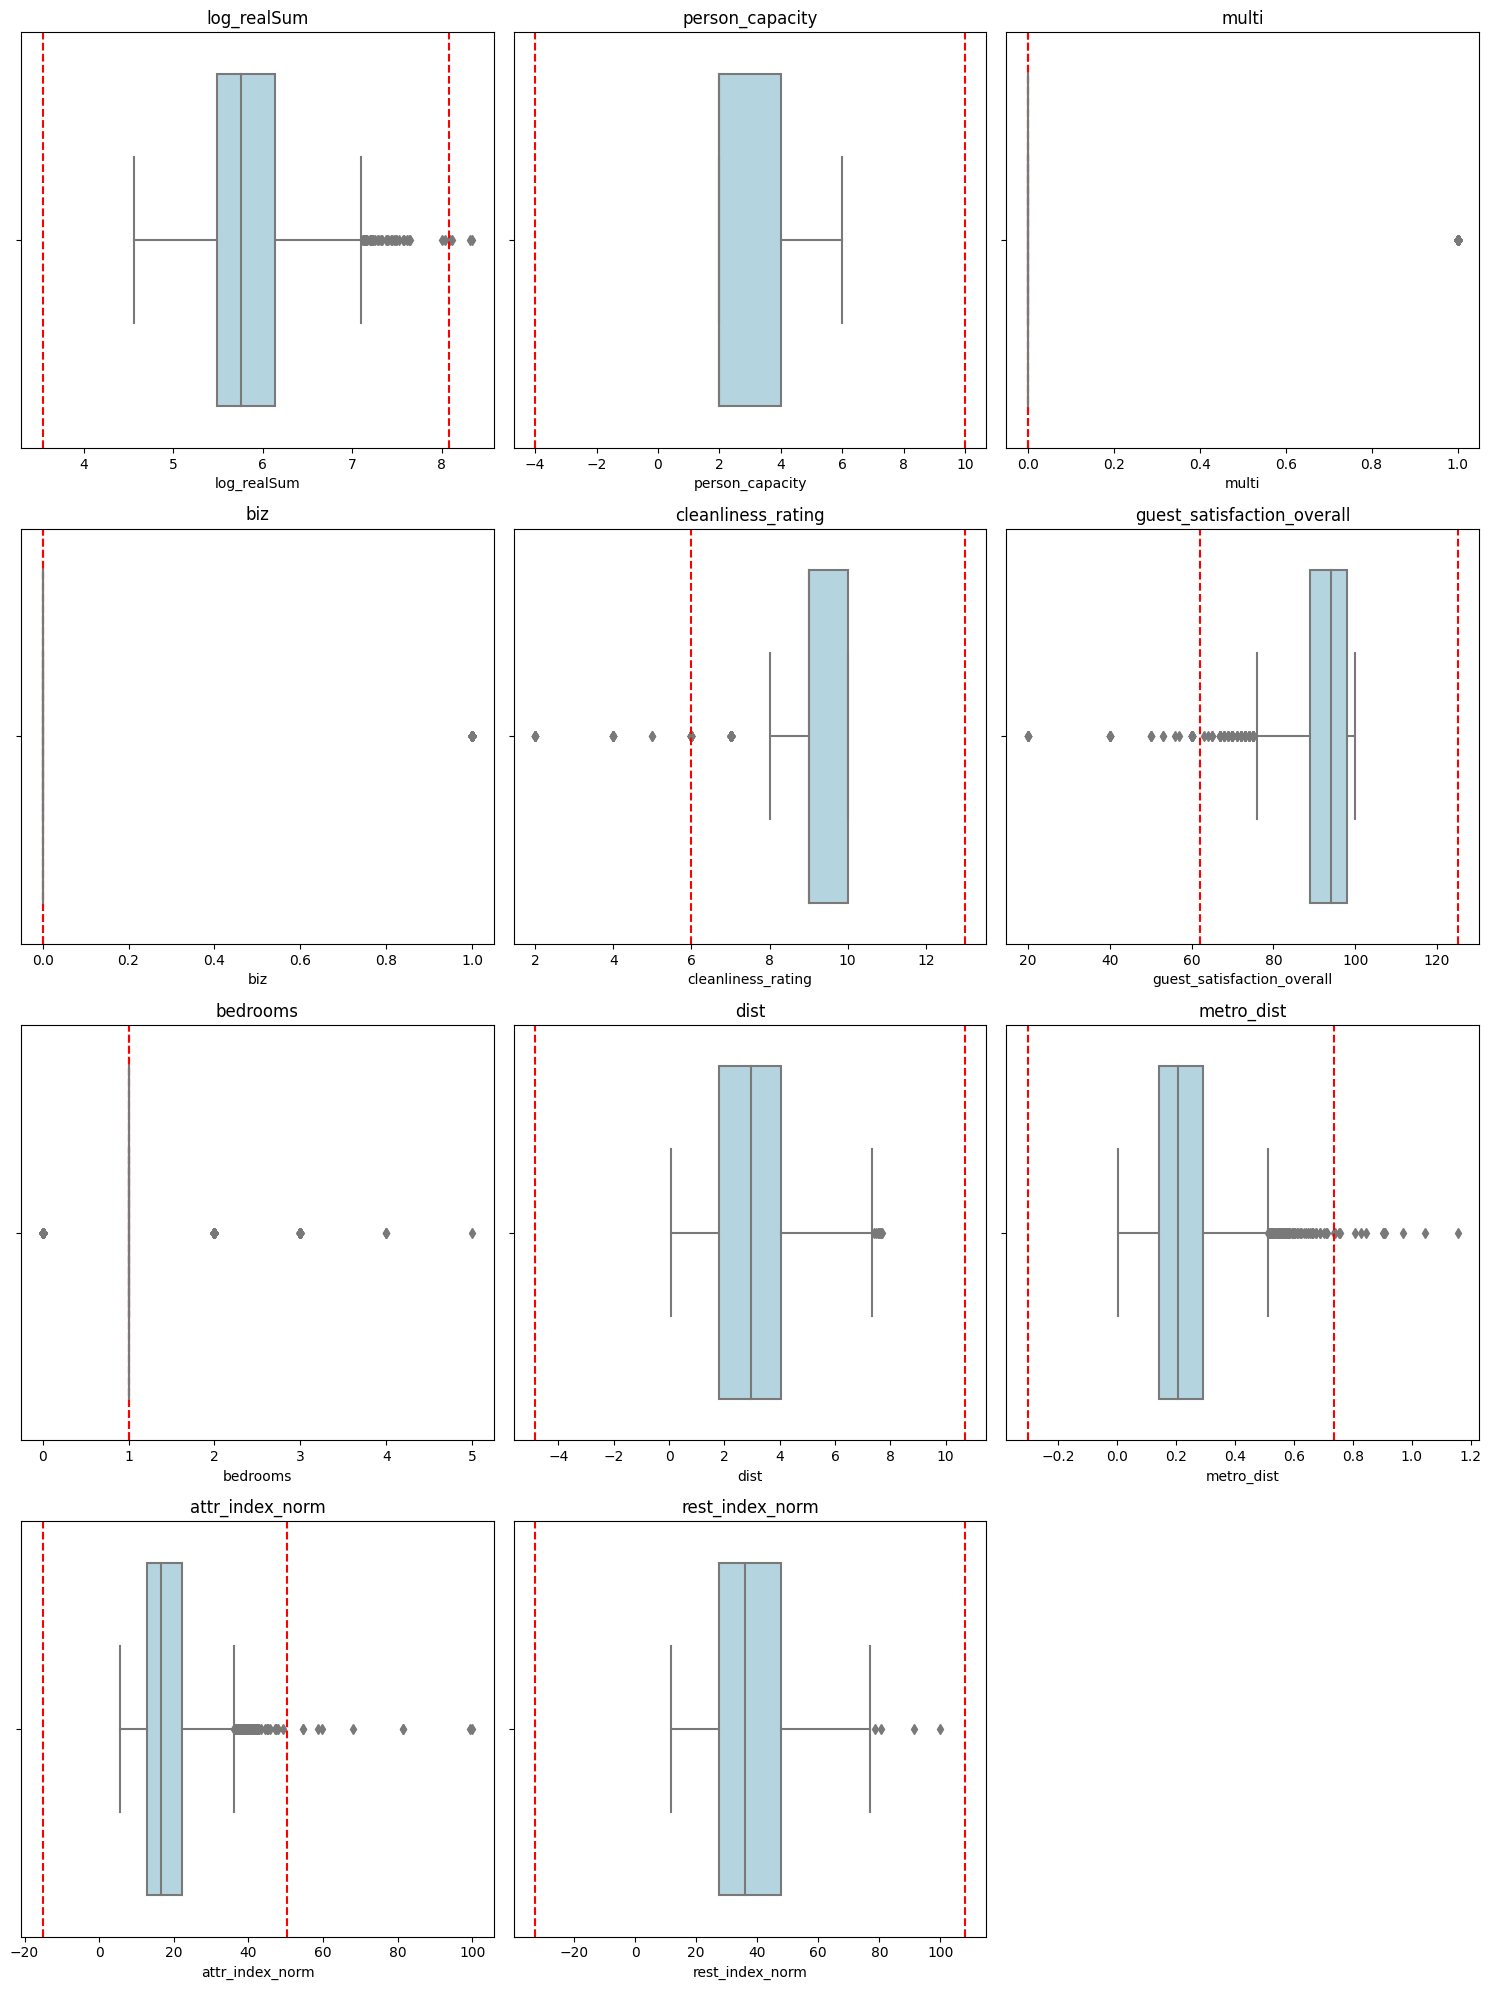

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert non-numeric columns to category data type for better handling in plots
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        df[col] = df[col].astype('category')

# Determine the number of rows required for the subplot, assuming 3 plots per row
num_columns = df.select_dtypes(include=['float64', 'int64']).shape[1]
rows = (num_columns // 3) + (1 if num_columns % 3 else 0)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the array of axes

# Create a boxplot for each numeric column
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    ax = axes[i]

    # Plot the boxplot
    sns.boxplot(x=df[col], ax=ax, color='lightblue')

    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 3 * IQR
    lower_bound = Q1 - 3 * IQR

    # Plot the vertical lines for the upper and lower bounds
    ax.axvline(upper_bound, color='red', linestyle='--')
    ax.axvline(lower_bound, color='red', linestyle='--')

    # Set the title
    ax.set_title(col)

# Remove any empty subplots
for j in range(i + 1, rows * 3):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

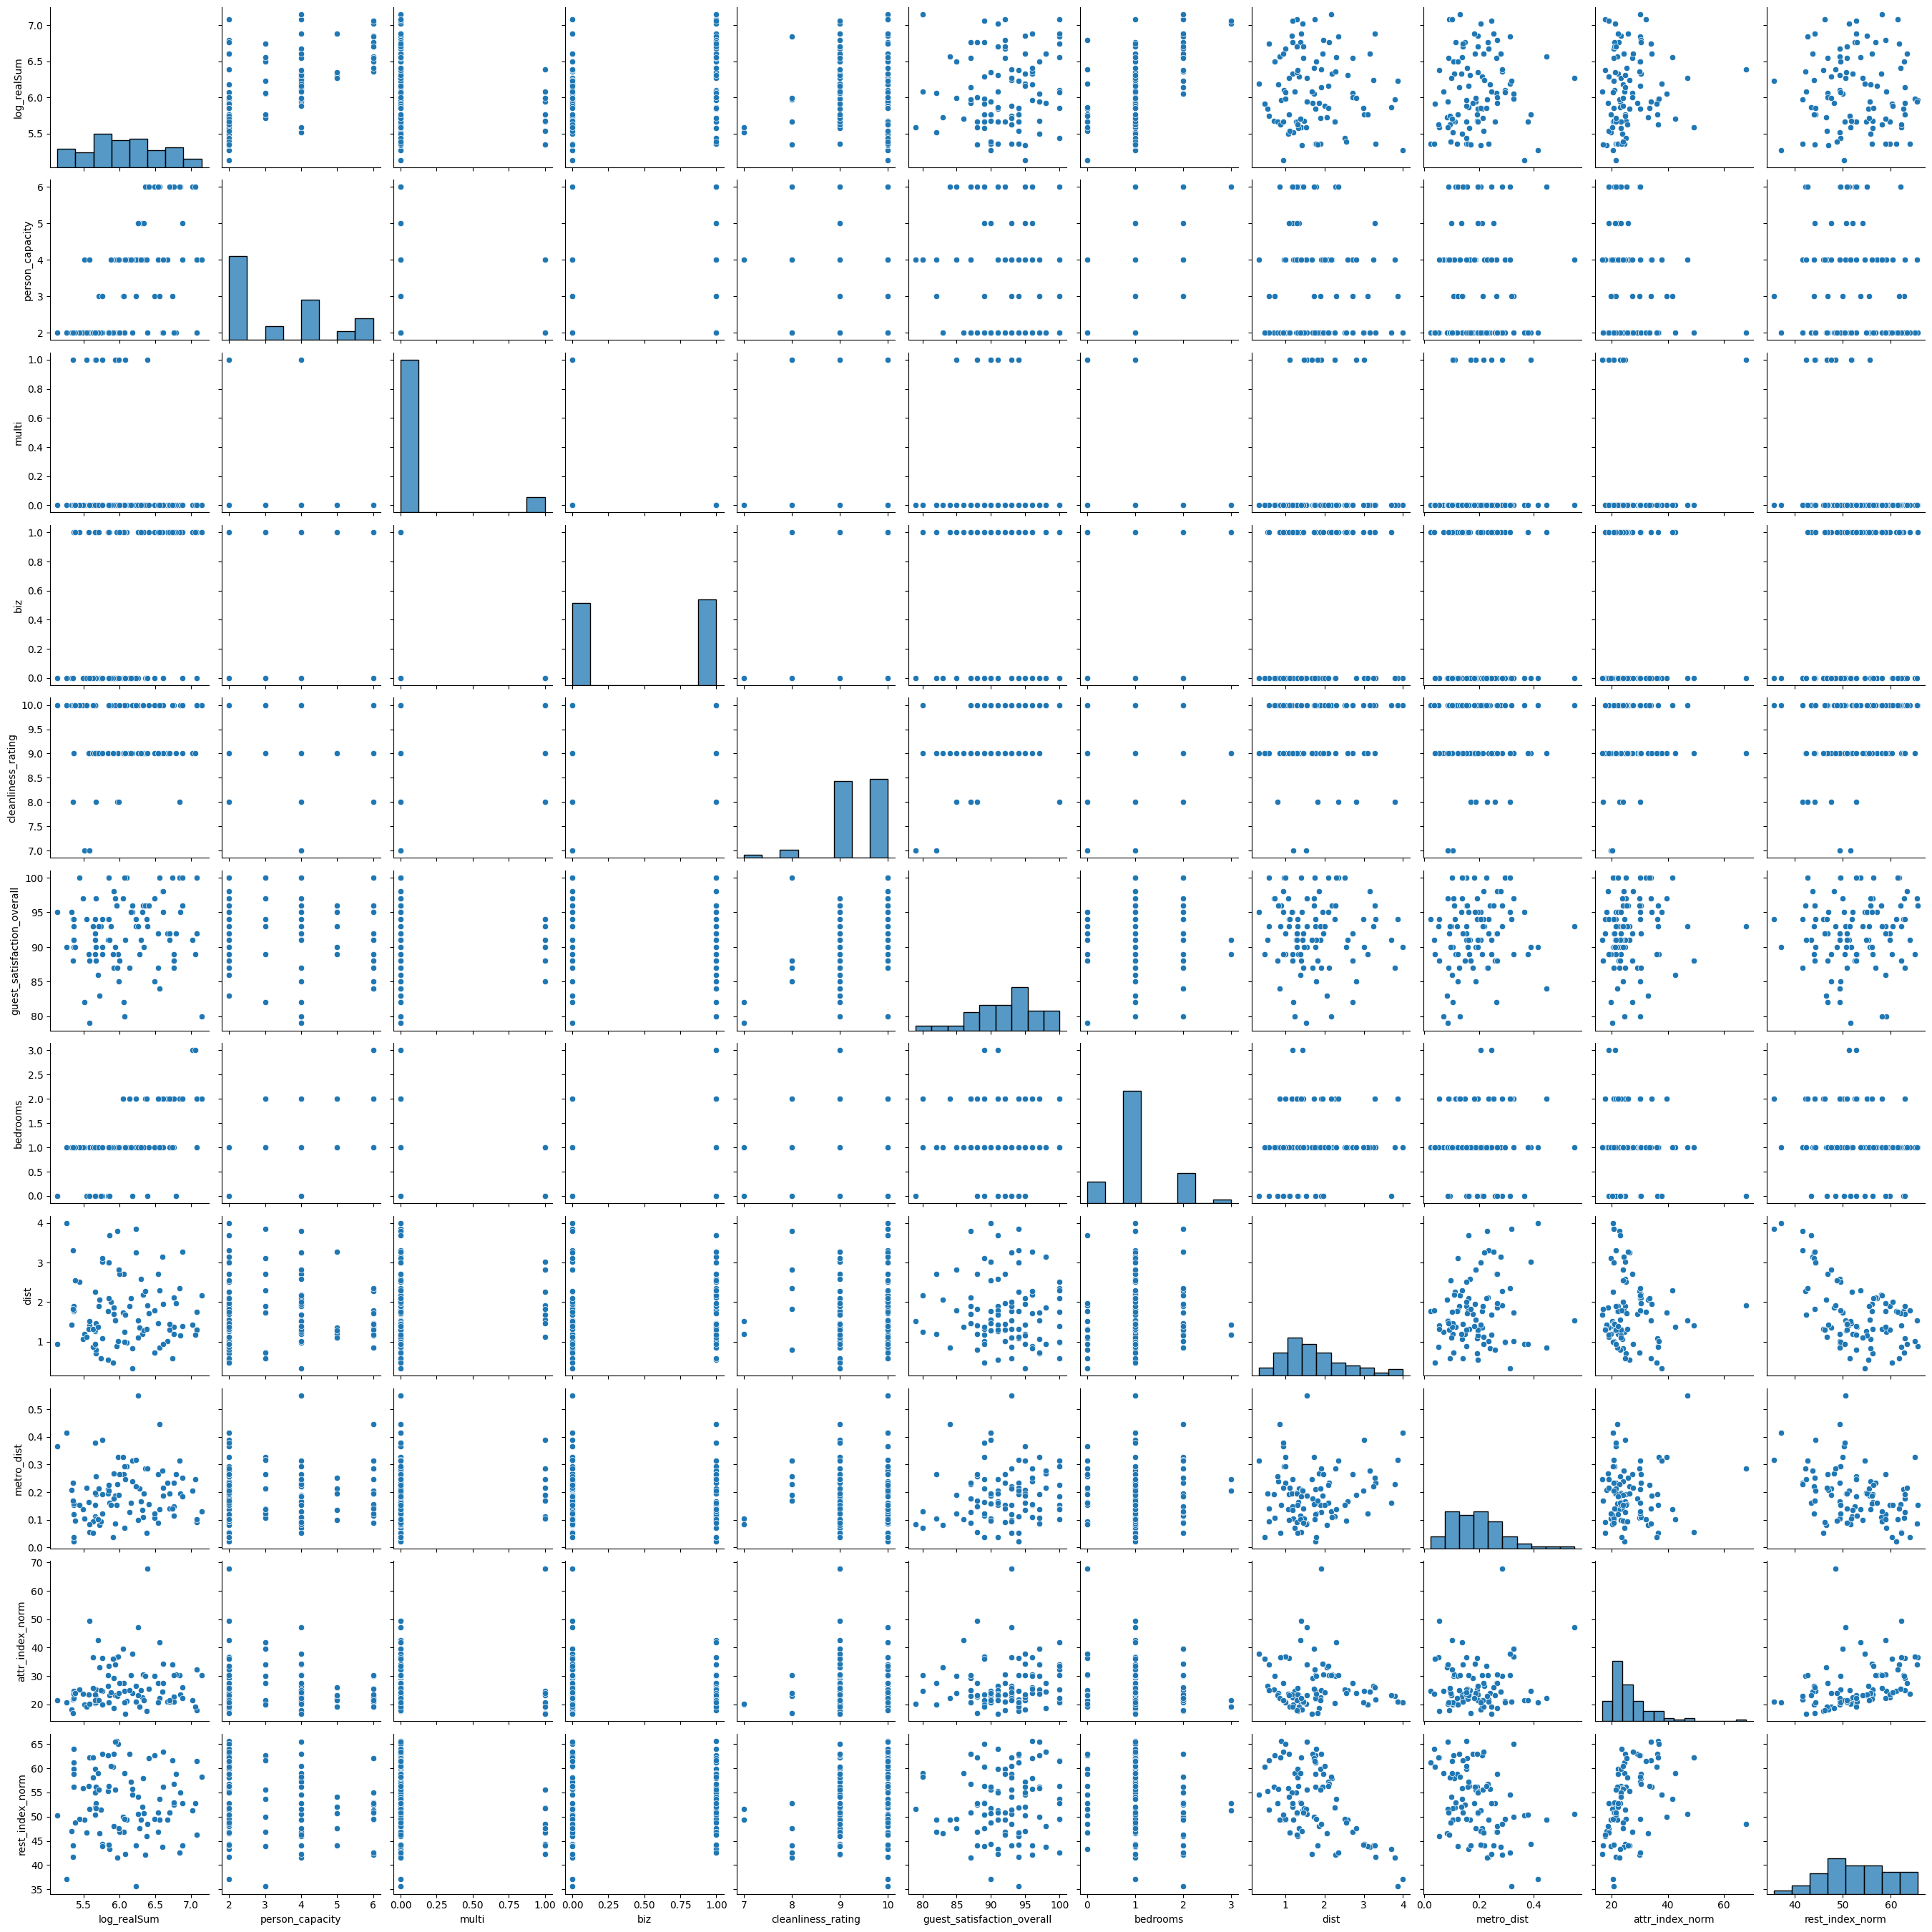

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Randomly select 100 rows instead of sorting and selecting the top 200
random_100_df = df.head(100)

# Select only numerical columns from the random 100 DataFrame
numerical_random_100_df = random_100_df.select_dtypes(include=['float64', 'int64'])

# Create pairplot (scatter plots for each pair of numerical columns)
sns.pairplot(numerical_random_100_df)

plt.show()

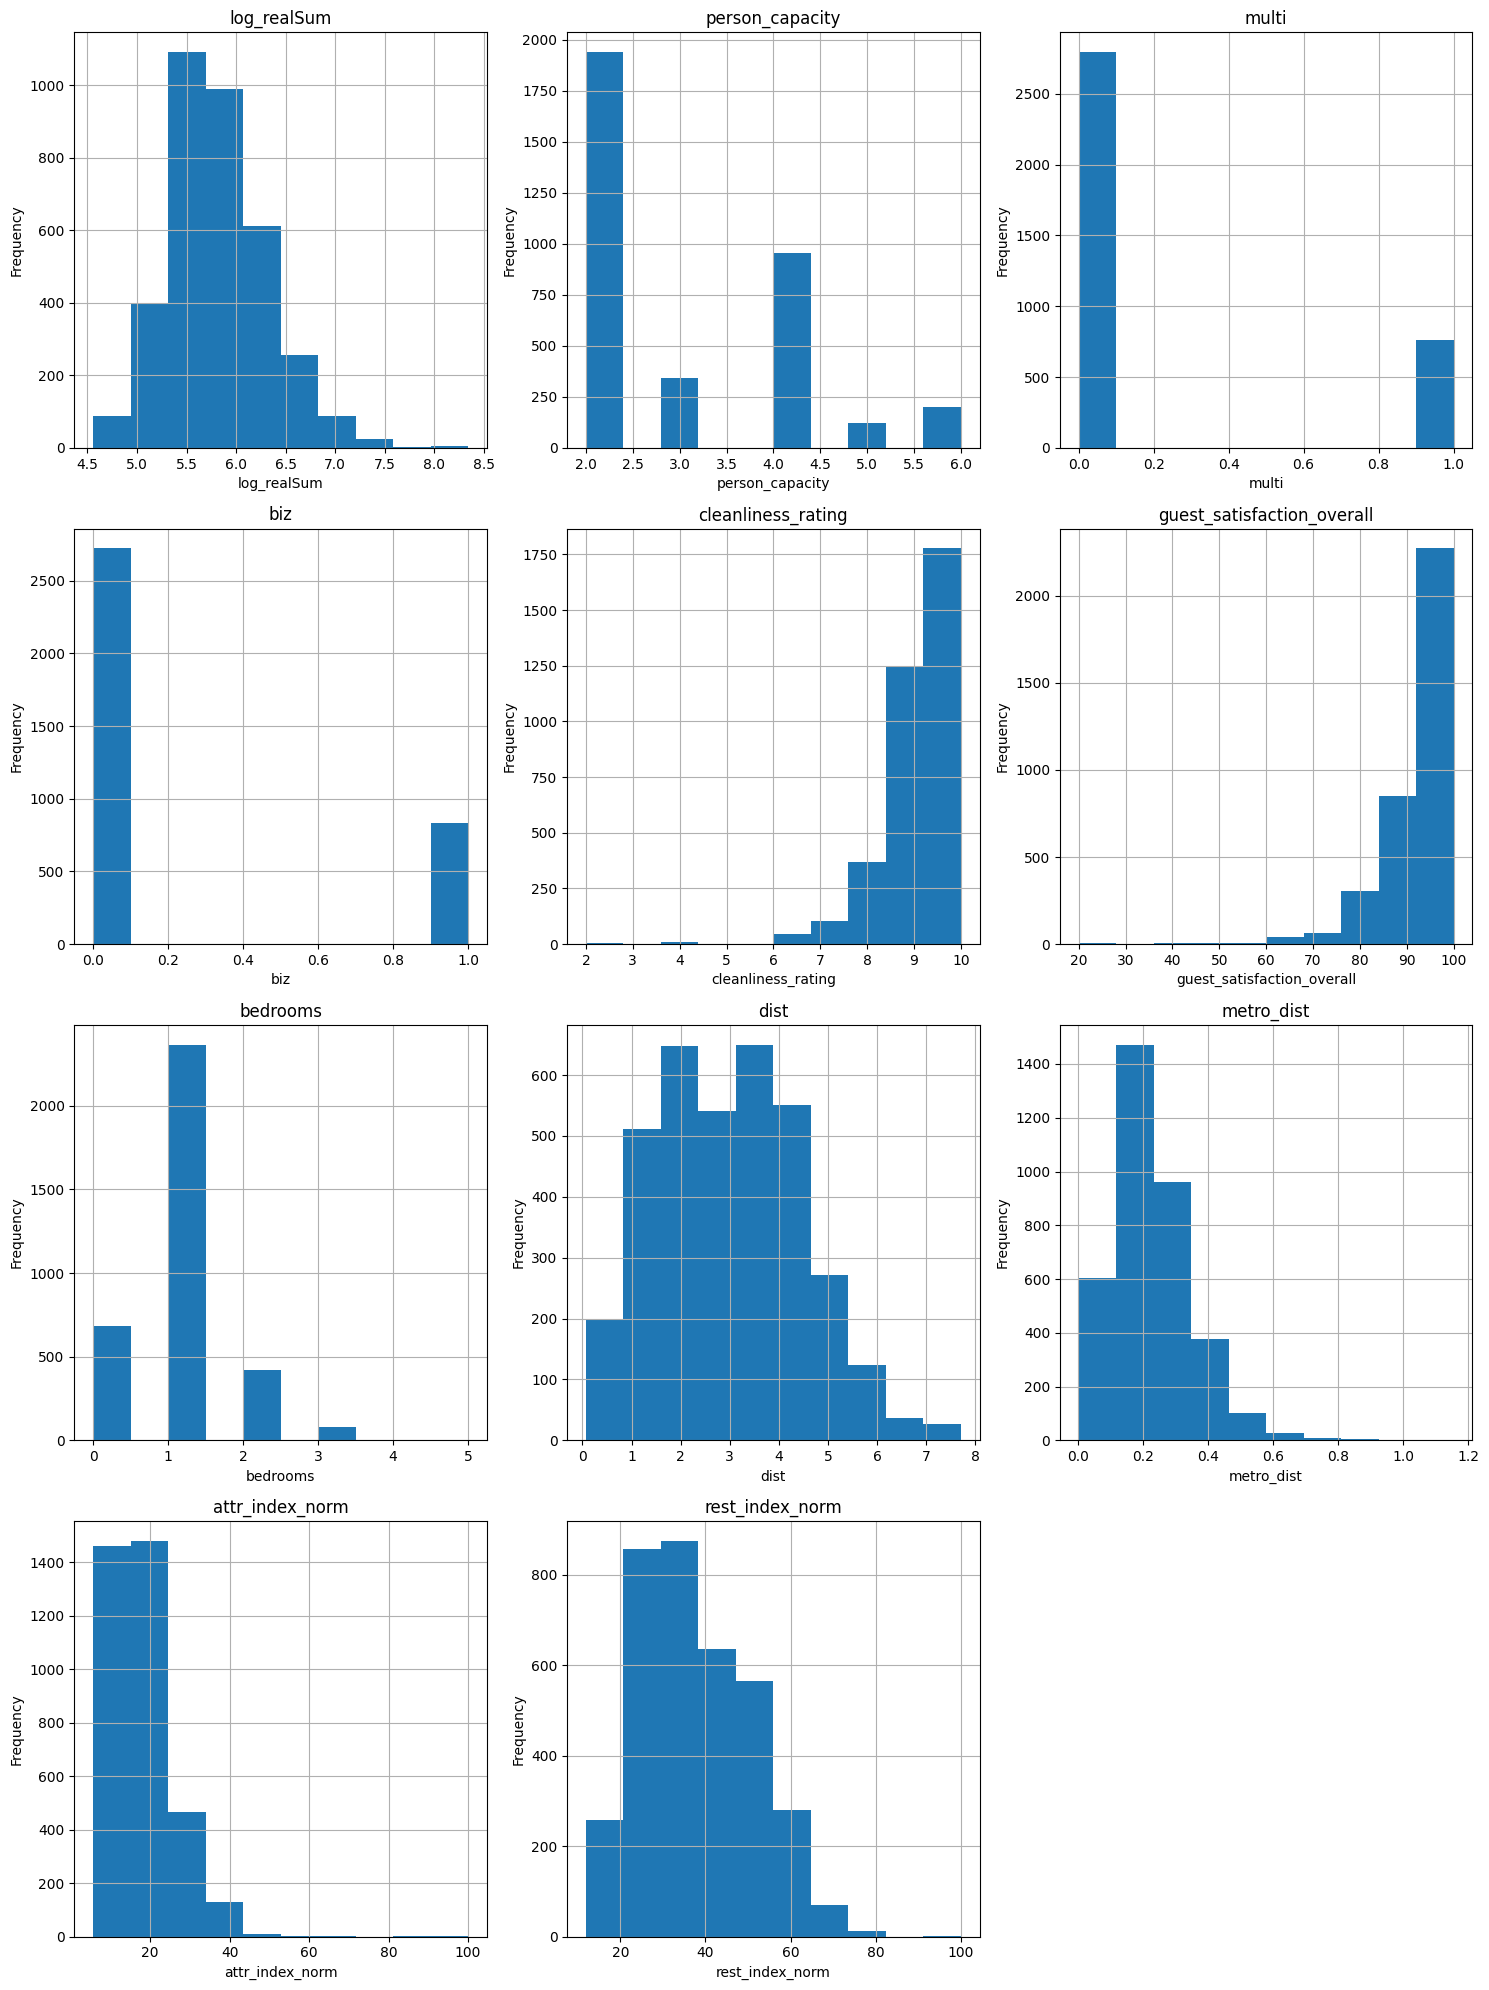

In [6]:
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows required for the subplot, assuming 3 plots per row
num_columns = len(numerical_columns)
rows = (num_columns // 3) + (1 if num_columns % 3 else 0)

# Create a figure with subplots
plt.figure(figsize=(15, 5 * rows))

# Create a histogram for each numerical column
for i, col in enumerate(numerical_columns):
    plt.subplot(rows, 3, i+1)
    df[col].hist()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

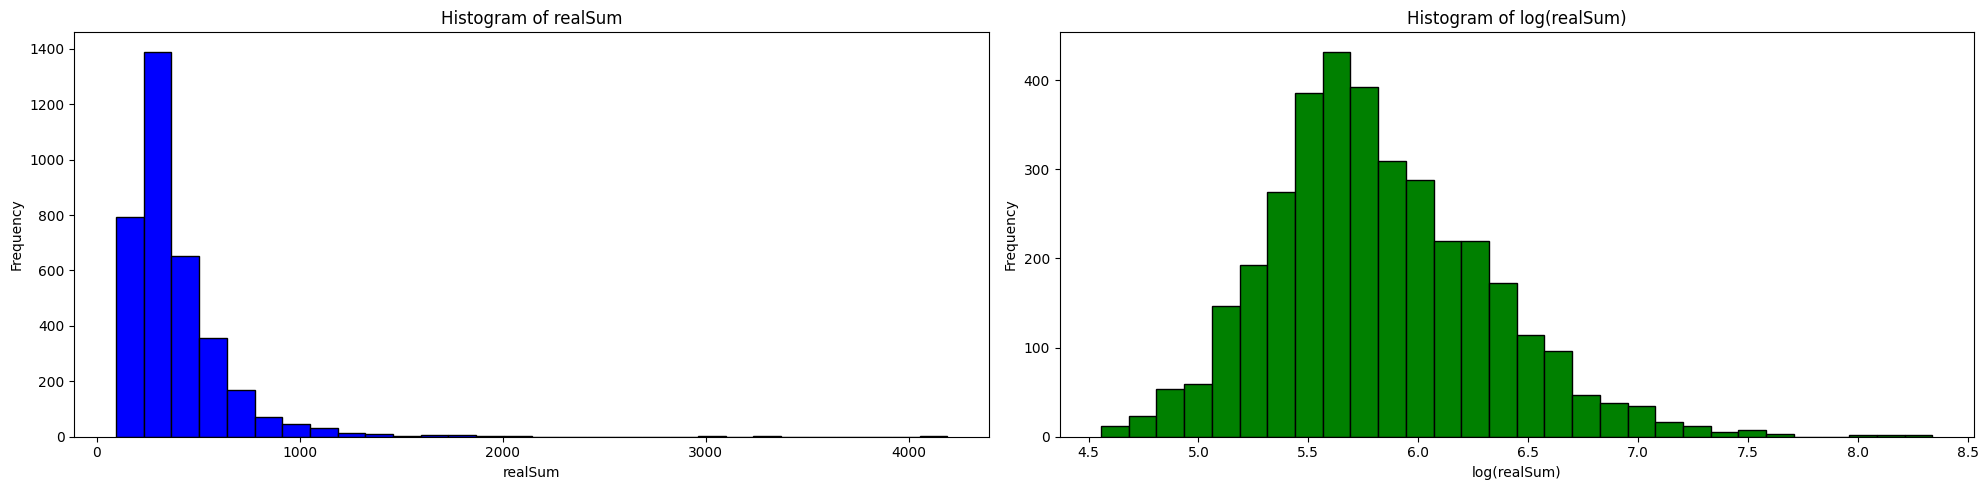

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('paris_weekends.csv')

# Handling zero or negative values
if (data['realSum'] <= 0).any():
    print("Warning: There are zero or negative values in realSum, which cannot be log-transformed.")
else:
    data['log_realSum'] = np.log(data['realSum'])

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plotting Histogram for realSum on the first subplot
axs[0].hist(data['realSum'], bins=30, color='blue', edgecolor='black')
axs[0].set_title('Histogram of realSum')
axs[0].set_xlabel('realSum')
axs[0].set_ylabel('Frequency')

# Plotting Histogram for log(realSum) on the second subplot
if 'log_realSum' in data:
    axs[1].hist(data['log_realSum'], bins=30, color='green', edgecolor='black')
    axs[1].set_title('Histogram of log(realSum)')
    axs[1].set_xlabel('log(realSum)')
    axs[1].set_ylabel('Frequency')

# Adjust the layout so that the subplots fit into the figure area
plt.tight_layout()
plt.show()

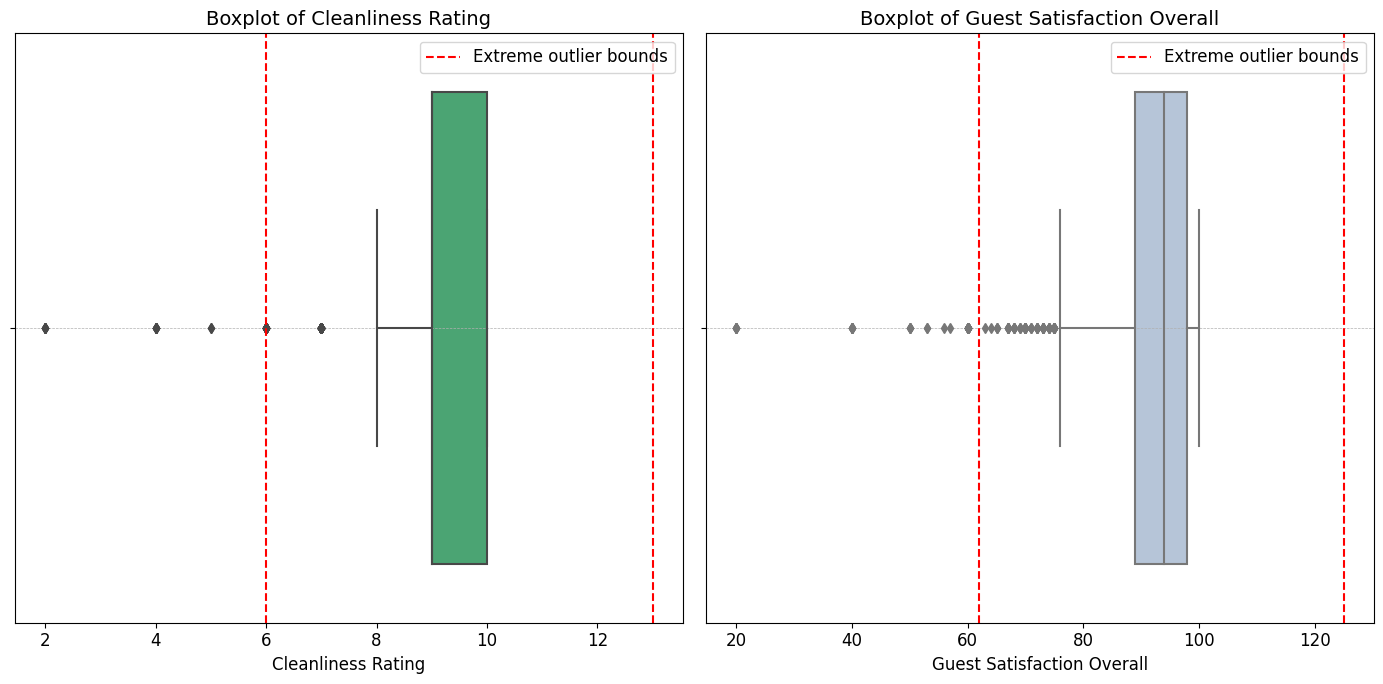

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Q1, Q3, and IQR for both columns
Q1_col1 = df['cleanliness_rating'].quantile(0.25)
Q3_col1 = df['cleanliness_rating'].quantile(0.75)
IQR_col1 = Q3_col1 - Q1_col1

Q1_col2 = df['guest_satisfaction_overall'].quantile(0.25)
Q3_col2 = df['guest_satisfaction_overall'].quantile(0.75)
IQR_col2 = Q3_col2 - Q1_col2

# Define upper and lower bounds for extreme outliers for both columns
upper_bound_col1 = Q3_col1 + 3 * IQR_col1
lower_bound_col1 = Q1_col1 - 3 * IQR_col1

upper_bound_col2 = Q3_col2 + 3 * IQR_col2
lower_bound_col2 = Q1_col2 - 3 * IQR_col2

import seaborn as sns
import matplotlib.pyplot as plt

# Customizing font size and style for better readability
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Plot the first column's boxplot on the first axis
sns.boxplot(x=df['cleanliness_rating'], ax=ax1, color='MediumSeaGreen')
ax1.axvline(upper_bound_col1, color='red', linestyle='--', label='Extreme outlier bounds')
ax1.axvline(lower_bound_col1, color='red', linestyle='--')
ax1.set_title('Boxplot of Cleanliness Rating', fontsize=14)
ax1.set_xlabel('Cleanliness Rating', fontsize=12)
ax1.grid(visible=True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Plot the second column's boxplot on the second axis
sns.boxplot(x=df['guest_satisfaction_overall'], ax=ax2, color='lightsteelblue')
ax2.axvline(upper_bound_col2, color='red', linestyle='--', label='Extreme outlier bounds')
ax2.axvline(lower_bound_col2, color='red', linestyle='--')
ax2.set_title('Boxplot of Guest Satisfaction Overall', fontsize=14)
ax2.set_xlabel('Guest Satisfaction Overall', fontsize=12)
ax2.grid(visible=True, which='both', axis='y', linestyle='--', linewidth=0.5)

# Display the legend on both subplots
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

# Adjust layout for tight fit and display the plot
plt.tight_layout()
plt.show()